### Purpose: 

Network analysis of lobbying network on capitol hill 

In [54]:
# Importing packages: 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import networkx as nx

## repeated printouts and wide-format text:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Fixing fonts:
plt.rcParams["font.family"] = "Times New Roman"


In [55]:
# Loading and inspectind data: 

lobbying_data = pd.read_csv("complete_bills_info2.csv")
lobbying_data.head(n = 5)
len(lobbying_data)
len(pd.unique(lobbying_data.Organization))
list_of_comapnies = pd.unique(lobbying_data.Organization)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ID,Bill_Title,Sponsor,Co_Sponsors,Organization,Year,Issue_Count,...,Unnamed: 93,Unnamed: 94,bill_number,classif,title,policy_area,main_boi_party,main_boi_name,co_sponsor_party_list,extraction_status
0,0,0.0,0.0,hconres10-118,H.Con.Res.10: Expressing the sense of Congress...,Tom Tiffany (R-WI),"Brian Babin (R-TX), Gus Bilirakis (R-FL), Lau...",PharmaEssentia Corp,2023.0,1.0,...,NaN,NaN,10,HCONRES,Expressing the sense of Congress that the Unit...,International Affairs,R,"Rep. Tiffany, Thomas P. [R-WI-7]","Rep. Perry, Scott [R-PA-10] Rep. Donalds, Byro...",complete
1,1,2.0,2.0,hconres12-118,H.Con.Res.12: Expressing the sense of Congress...,Kat Cammack (R-FL),"Brad Finstad (R-MN), Michelle Fischbach (R-MN...",American Sugar Alliance,2023.0,5.0,...,NaN,NaN,12,HCONRES,Expressing the sense of Congress that all dire...,Foreign Trade and International Finance,R,"Rep. Cammack, Kat [R-FL-3]","Rep. Kildee, Daniel T. [D-MI-8] Rep. Letlow, J...",complete
2,2,3.0,3.0,hconres13-118,H.Con.Res.13: Supporting the Local Radio Freed...,Steve Womack (R-AR),"Robert B Aderholt (R-AL), Mark Alford (R-MO),...",iHeartMedia Inc,2023.0,17.0,...,NaN,NaN,13,HCONRES,Supporting the Local Radio Freedom Act.,"Science, Technology, Communications",R,"Rep. Womack, Steve [R-AR-3]","Rep. Castor, Kathy [D-FL-14] Rep. Amodei, Mark...",complete
3,3,4.0,4.0,hconres13-118,H.Con.Res.13: Supporting the Local Radio Freed...,Steve Womack (R-AR),"Robert B Aderholt (R-AL), Mark Alford (R-MO),...",National Assn of Broadcasters,2023.0,14.0,...,NaN,NaN,13,HCONRES,Supporting the Local Radio Freedom Act.,"Science, Technology, Communications",R,"Rep. Womack, Steve [R-AR-3]","Rep. Castor, Kathy [D-FL-14] Rep. Amodei, Mark...",complete
4,4,5.0,5.0,hconres13-118,H.Con.Res.13: Supporting the Local Radio Freed...,Steve Womack (R-AR),"Robert B Aderholt (R-AL), Mark Alford (R-MO),...",Recording Industry Assn of America,2023.0,3.0,...,NaN,NaN,13,HCONRES,Supporting the Local Radio Freedom Act.,"Science, Technology, Communications",R,"Rep. Womack, Steve [R-AR-3]","Rep. Castor, Kathy [D-FL-14] Rep. Amodei, Mark...",complete


18166

2491

In [56]:
# Creating dataframe for bill IDs

id_aggregated = lobbying_data.groupby('Organization')['ID'].agg(lambda x: ', '.join(x)).reset_index()
id_aggregated['formatted_ids'] = [str(x).replace("[", "").replace("]", "").replace("'", "").replace(" ", "").split(',') for x in id_aggregated["ID"]]
id_aggregated["len_ids"]  = [len(x) for x in id_aggregated['formatted_ids']]
id_aggregated

,Organization,ID,formatted_ids,len_ids
0,1890 Universities Foundation,"hr4236-118, hr5780-118, s2998-118","[hr4236-118, hr5780-118, s2998-118]",3
1,21st Century School Fund,"hr5049-118, s2608-118","[hr5049-118, s2608-118]",2
2,23andMe Inc,hr4128-118,[hr4128-118],1
3,340B Health,"hr3561-118, s1038-118","[hr3561-118, s1038-118]",2
4,60 Plus Assn,hr21-118,[hr21-118],1
...,...,...,...,...
2485,Zurich Insurance Group,"hjres30-118, hr1697-118, hr1740-118, hr2811-11...","[hjres30-118, hr1697-118, hr1740-118, hr2811-1...",13
2486,doTERRA International,"hr4794-118, hr5419-118, s2159-118","[hr4794-118, hr5419-118, s2159-118]",3
2487,eBay Inc,"hr190-118, hr3550-118, hr5502-118, hr895-118, ...","[hr190-118, hr3550-118, hr5502-118, hr895-118,...",10
2488,ecoSPEARS Inc,s466-118,[s466-118],1


In [57]:
# Creating adjacency matrix: 


outer_dict = {}


for initial_cpmpany in list_of_comapnies[:1]:

    
    initial_lists = id_aggregated["formatted_ids"][id_aggregated.Organization == initial_cpmpany]
    
    initial_lists = list(initial_lists)[0]

    
    internal_dict = {}

    # Setting up:
    for secondary_comapny in list_of_comapnies:
            internal_dict[secondary_comapny] = 0 
    
    # internal_dict = {}
    for main_comp_bill in initial_lists:


        for secondary_company in list_of_comapnies:
            
            secondary_list = id_aggregated["formatted_ids"][id_aggregated.Organization == secondary_company]
            
            secondary_list = secondary_list
            
            if main_comp_bill in secondary_list:

                internal_dict[secondary_company] += 1

    outer_dict[initial_cpmpany] = internal_dict
    

neighbors = pd.DataFrame.from_dict(outer_dict, orient='index')

neighbors = neighbors.reset_index().rename(columns={'index' : 'firm'})
                

In [58]:
neighbors
secondary_company
secondary_list
list_of_comapnies[-1]

,firm,PharmaEssentia Corp,American Sugar Alliance,iHeartMedia Inc,National Assn of Broadcasters,Recording Industry Assn of America,Soundexchange,Universal Music Group,National Religious Broadcasters,Independent Petroleum Assn of America,...,Volunteers of America,Benevis LLC,Sylvamo Corp,Metra Northeast IL Regional Commuter RR,New Jersey State Bar Assn,Relativity Space,Pearson PLC,Rhode Island Airport Corp,Defined Benefit Retirement Protection Fund,Global Arm
0,PharmaEssentia Corp,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'Global Arm'

1084    [sres244-118]
Name: formatted_ids, dtype: object

'Global Arm'

In [59]:
# Saving to CSV: 
# neighbors.to_csv("622_firms_neighbors.csv", index = False)
neighbors = pd.read_csv("622_firms_neighbors.csv")
neighbors.head()

len(pd.unique(neighbors.firm))

,firm,iHeartMedia Inc,National Assn of Broadcasters,Independent Petroleum Assn of America,Earthjustice Legal Defense Fund,NextGen Climate Action,National Treasury Employees Union,Friends Cmte on National Legislation,Heritage Foundation,Center for Reproductive Rights,...,BSA The Software Alliance,British American Tobacco,Mercy for Animals,National Auto Dealers Assn,Rocky Mountain Elk Foundation,Meta,Portland General Electric,Twitter,Theodore Roosevelt Conservation Partnership,SLM Corp
0,iHeartMedia Inc,8,6,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,National Assn of Broadcasters,6,24,0,0,0,1,0,1,0,...,0,1,0,0,0,2,0,1,0,0
2,Independent Petroleum Assn of America,0,0,10,2,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Earthjustice Legal Defense Fund,0,0,2,57,2,1,0,4,0,...,0,0,2,0,3,0,2,0,0,0
4,NextGen Climate Action,0,0,2,2,11,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


622

Text(0.5, 1.0, 'Network of Lobbying on Capitol Hill')

Text(0.5, 0.98, 'Complex network with no discernable clusters or grouping')

Text(0.5, 0.001, 'Source: Scraped from OpenSecrets.org')

Text(0.5, 0.02, 'Highlighted Firms: Amazon.com, Alphabet Inc, Microsoft Corp and Meta')

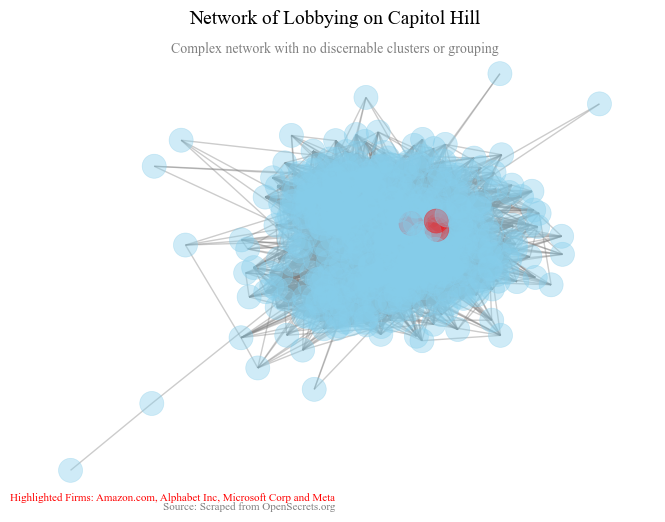

In [60]:
# Shaping adjacency matrix to numpy array 

neighbors_numpy = neighbors.iloc[:, 1:].to_numpy()

# Creating a graph from the adjacency matrix
G = nx.from_numpy_array(neighbors_numpy)

# Removing self-loops
G.remove_edges_from(nx.selfloop_edges(G))

# # Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
df_degree_centrality = pd.DataFrame(list(degree_centrality.items()), columns=['Node', 'Degree_Centrality'])
df_degree_centrality['Degree'] = df_degree_centrality['Node'].map(dict(G.degree()))

# Merging with firm names
df_degree_centrality["firm_name"] = neighbors["firm"]

# Highlighting specific firms with red color 
df_degree_centrality["Color"] = ["red" if (x == "Amazon.com") or (x == "Alphabet Inc") or (x == "Microsoft Corp") or  (x == "Meta") else "skyblue" for x in df_degree_centrality["firm_name"]]

# Adding labels
df_degree_centrality["Label"] = ["Amazon" if (x == "Amazon.com") else
                                  "Alphabet" if (x == "Alphabet Inc") else
                                  "Microsoft" if (x == "Microsoft Corp") else
                                  "Meta" if (x == "Meta") else
                                  "" for x in df_degree_centrality["firm_name"]]

# Converting them to dictionaries 
node_colors = df_degree_centrality.set_index('Node')['Color'].to_dict()
node_labels = df_degree_centrality.set_index('Node')['Label'].to_dict()


# Drawing the graph
pos = nx.fruchterman_reingold_layout(G) 
nx.draw(G, pos, 
        with_labels=False, 
        # font_weight='bold', 
        # node_size=700, 
        labels = node_labels,
        node_color=[node_colors[node] for node in G.nodes], 
        font_color='black', 
        font_size=10, 
        linewidths=0.5, 
        edge_color='gray', 
        alpha=0.4)

# Editing the graph

plt.title("Network of Lobbying on Capitol Hill", fontsize=14)
plt.suptitle("Complex network with no discernable clusters or grouping", fontsize=10, color='gray')

caption_text = "Source: Scraped from OpenSecrets.org"
plt.figtext(0.5, 0.001, caption_text, ha="right", va="bottom", fontsize=8, color='gray')


caption_text = "Highlighted Firms: Amazon.com, Alphabet Inc, Microsoft Corp and Meta"
plt.figtext(0.5, 0.02, caption_text, ha="right", va="bottom", fontsize=8, color='red')

plt.show()


In [61]:
# Exploring graph and values: 
df_degree_centrality.shape

df_degree_centrality.sort_values(by='Degree_Centrality', ascending=False).head(n = 2)
df_degree_centrality.sort_values(by='Degree_Centrality', ascending = True).head(n = 2)

df_degree_centrality[df_degree_centrality.firm_name == "Amazon.com"]

df_degree_centrality[df_degree_centrality.firm_name == "Meta"]


(622, 6)

,Node,Degree_Centrality,Degree,firm_name,Color,Label
66,66,0.536232,333,US Chamber of Commerce,skyblue,
5,5,0.341385,212,National Treasury Employees Union,skyblue,


,Node,Degree_Centrality,Degree,firm_name,Color,Label
233,233,0.001610,1,Joint Baltic American National Cmte,skyblue,
307,307,0.003221,2,Ascensus,skyblue,


,Node,Degree_Centrality,Degree,firm_name,Color,Label
243,243,0.198068,123,Amazon.com,red,Amazon


,Node,Degree_Centrality,Degree,firm_name,Color,Label
617,617,0.091787,57,Meta,red,Meta


In [62]:
# Adding funds data: 

funds = pd.read_csv("lobbying_and_their_funds.csv" ,index_col=None)
funds["funds_int"] = [int(x.replace("$", "").replace(",", "")) for x in funds["Total"]]
funds = funds.groupby("Company").agg({"funds_int" : "sum"}).reset_index()

res = pd.merge(df_degree_centrality, funds[['Company', 'funds_int']], right_on ='Company', left_on = "firm_name", how='left')

res = res.dropna(subset=['Company'])

res.sort_values(by='funds_int', ascending = False).head(n = 10)

res_subset = res[res["Company"].isin(["Amazon.com", "Alphabet Inc", "Microsoft Corp", "Meta"])]

,Node,Degree_Centrality,Degree,firm_name,Color,Label,Company,funds_int
66,66,0.536232,333,US Chamber of Commerce,skyblue,,US Chamber of Commerce,49970000.0
62,62,0.119163,74,National Assn of Realtors,skyblue,,National Assn of Realtors,33661316.0
145,145,0.243156,151,Blue Cross/Blue Shield,skyblue,,Blue Cross/Blue Shield,21634765.0
228,228,0.225443,140,Pharmaceutical Research & Manufacturers of Ame...,skyblue,,Pharmaceutical Research & Manufacturers of Ame...,21043000.0
142,142,0.305958,190,American Hospital Assn,skyblue,,American Hospital Assn,20928991.0
141,141,0.333333,207,American Medical Assn,skyblue,,American Medical Assn,15330000.0
243,243,0.198068,123,Amazon.com,red,Amazon,Amazon.com,14970000.0
617,617,0.091787,57,Meta,red,Meta,Meta,14640000.0
540,540,0.103060,64,Business Roundtable,skyblue,,Business Roundtable,13490000.0
443,443,0.082126,51,CTIA,skyblue,,CTIA,11570000.0


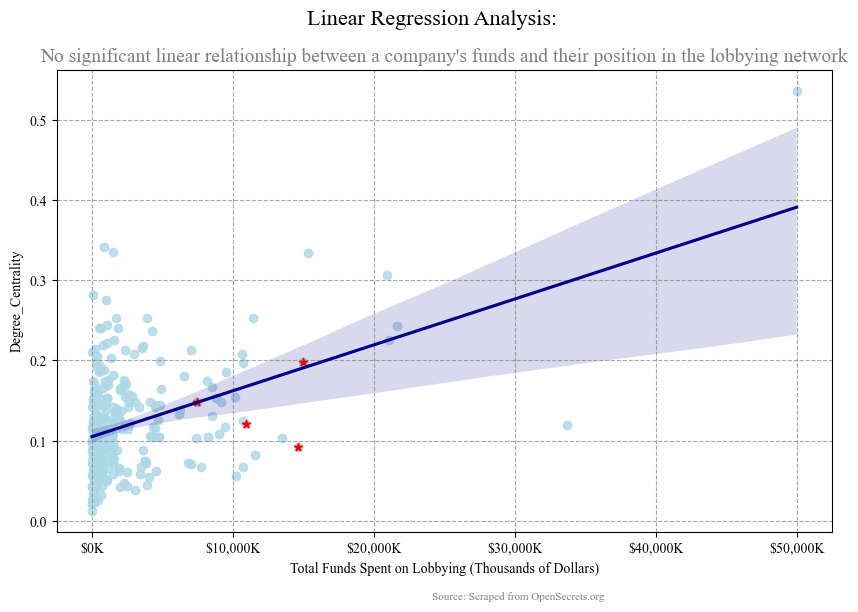

In [64]:
# Getting regression on funds and 
def currency_formatter(x, pos):
    return f"${int(x/1000):,}K"

# Sample data
x = res["funds_int"]
y = res["Degree_Centrality"]

plt.figure(figsize=(10, 6))


# Fit a linear regression model and plot the regression line with a 95% CI
sns.regplot(x=x, y=y, ci=95, color='darkblue', line_kws={'color': 'darkblue'}, scatter_kws={'color': 'lightblue'})
plt.scatter(res_subset["funds_int"], res_subset["Degree_Centrality"], color='red', marker='*', label='Highlighted Points')

plt.xlabel("Total Funds Spent on Lobbying (Thousands of Dollars)")
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))


plt.ylabel("Degree_Centrality")

# Add title and subtitle
plt.suptitle("Linear Regression Analysis:", y=0.98, fontsize=16)
plt.title("No significant linear relationship between a company's funds and their position in the lobbying network", fontsize=14, color='gray')


# Add caption
caption_text = "Source: Scraped from OpenSecrets.org"
plt.figtext(0.5, 0.001, caption_text, ha="left", va="center", fontsize=8, color='gray')


plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.show();
